## Amazon Fine Food Reviews

![Sentiment_Analysis](sent_analysis.png)

## Table of Contents

* [1. Executive Summary](#sum)

* [2. Data Pre-Processing](#prep)
  * [2.1 Loading Packages](#sub_2_1)
  * [2.2 Read-in Data and NLTK Basics](#sub_2_2)
  * [2.3 Quick EDA](#sub_2_3)
  * [2.4 Basic NLTK](#sub_2_4)

* [3. Data Analysis [VADER vs RoBERTa]](#analysis)
  * [3.1 VADER Sentiment Scoring](#sub_3_1)
  * [3.2 VADER Results](#sub_3_2)
  * [3.3 RoBERTa Pretrained Model](#sub_3_3)

* [4. Compare Scores between two models](#compare)
  * [ Review Examples](#sub_4_1)
  
* [5. The Transformers Pipeline](#pipeline)

* [6. Conclusion: Comparative Insights Between VADER and RoBERTa](#conclusion)


## <span style="color:#fc8080">**1. Executive Summary:** <a id="sum"> </a>

In this project, I conducted sentiment analysis on Amazon Fine Food Reviews using two distinct approaches:

* VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach: a rule-based sentiment analysis tool based on a bag-of-words approach, particularly tuned for social media text and short reviews.
* RoBERTa (A Robustly Optimized BERT Pretraining Approach): a transformer-based model from Hugging Face's 🤗 Transformers library, pre-trained on a large corpus to understand context and nuances in natural language. 

Using the Hugging Face pipeline, I applied the RoBERTa model directly to the review dataset, allowing for seamless and scalable inference. I compared the outputs of both models across a range of reviews and sentiment categories to evaluate their performance and interpretability.

## <span style="color:#fc8080">**2. Data Pre-Processing** <a id="prep"> </a>

### 2.1 Loading Packages <a id =sub_2_1> </a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### 2.2 Read-in Data and NLTK Basics  <a id =sub_2_2> </a>

**Dataset**: 
I used the Amazon Fine Food Reviews dataset available on [Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews). This dataset contains over 500,000 food reviews from Amazon, including:

- Review text
- Summary
- User information
- Product ID
- Time of review

It is widely used for natural language processing (NLP) tasks such as sentiment analysis, text classification, and recommendation systems.

In [2]:
df = pd.read_csv('./data/Reviews.csv')
print(df.shape)
df = df.head(500) # For testing purposes, we can limit the dataset to 1000 rows
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### 2.3 Quick EDA  <a id =sub_2_3> </a>

In [4]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

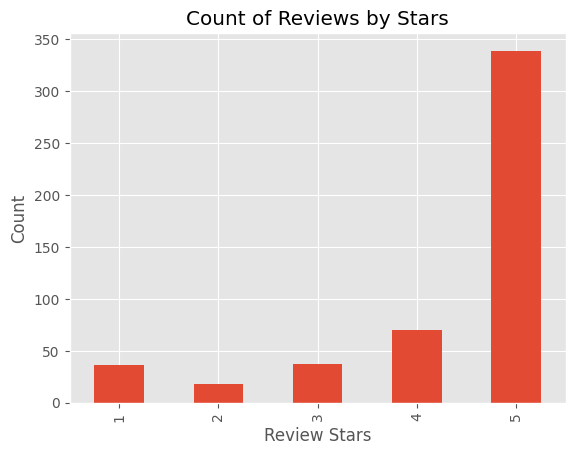

In [5]:
# Plotting the distribution of scores
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Reviews by Stars') 
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

### 2.4 Basic NLTK <a id =sub_2_4> </a>

In [6]:
#Take a look at random review (text)
example = df['Text'].values[5]

In [7]:
import nltk
# Download the necessary NLTK data files (if not already downloaded)
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('maxent_ne_chunker_tab')
# nltk.download('words')

In [8]:
# Explicitly add the directory where nltk_data is located
# nltk.data.path.append(r'C:/Users/sachi/AppData/Roaming/nltk_data')
from nltk.tokenize import word_tokenize

# Tokenize the example review
tokens = word_tokenize(example)
tokens[:10]  # Show the first 10 tokens

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [9]:
#  POS tagging for identifying parts of speech
from nltk import pos_tag 
tagged = pos_tag(tokens)
tagged[:10]  # Show the first 10 tagged tokens

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [10]:
#  Named Entity Recognition
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()  # Print the named entities in a pretty format


(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


## <span style="color:#fc8080">**3. Data Analysis [VADER vs RoBERTa]** <a id="analysis"> </a>

### 3.1 VADER Sentiment Scoring <a id =sub_3_1> </a>
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

* This uses a "bag of words" approach:
  - Stop words are removed (and/a/the/or...)
  - Each word is scored and combined to a total score.
  - This model will not pick up sentiments on relationships between words

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


# Download the VADER lexicon (if not already downloaded)
# nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer 
sia = SentimentIntensityAnalyzer()

In [12]:
print(df['Text'].values[50]) # Taking random example of a review text

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [13]:
sia.polarity_scores(df['Text'].values[50])   # Example of using VADER to get sentiment scores

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
sia.polarity_scores(example)  # Get the sentiment scores for the example review

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [15]:
# Run the polarity scores for all reviews for the 'Text' column in the dataframe
res ={}
for i in tqdm(range(len(df))):
    res[i] = sia.polarity_scores(df['Text'].values[i])  

# Convert the results to a DataFrame
pd.DataFrame(res).T.head()

  0%|          | 0/500 [00:00<?, ?it/s]

,neg,neu,pos,compound
0,0.000,0.695,0.305,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.091,0.754,0.155,0.8265
3,0.000,1.000,0.000,0.0000
4,0.000,0.552,0.448,0.9468


In [16]:
# Merge the results with the original DataFrame (for the score and metadata)
vaders = df.join(pd.DataFrame(res).T)
# Renaming the column
vaders = vaders.rename(columns={
  'neg': 'vader_neg',
  'neu': 'vader_neu',
  'pos': 'vader_pos'
})
vaders.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


### 3.2 VADER results <a id =sub_3_2> </a>

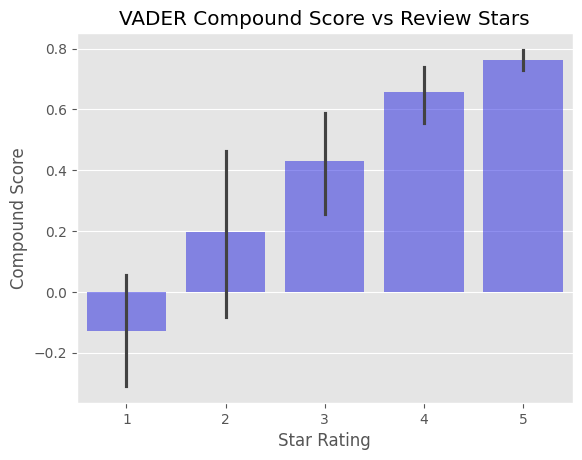

In [17]:
sns.barplot(x='Score', y='compound', data=vaders, color='blue', alpha=0.5)
plt.title('VADER Compound Score vs Review Stars')
plt.xlabel('Star Rating')
plt.ylabel('Compound Score')
plt.show()

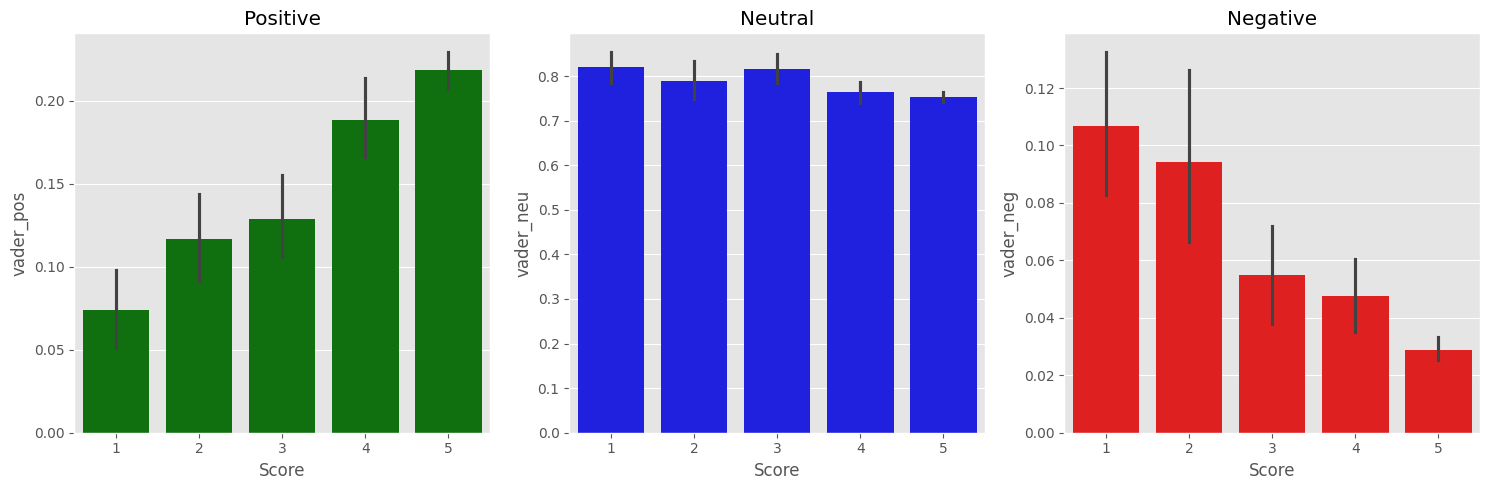

In [18]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x='Score', y='vader_pos', data=vaders, ax=axs[0], color='green')
sns.barplot(x='Score', y='vader_neu', data=vaders, ax=axs[1], color='blue')
sns.barplot(x='Score', y='vader_neg', data=vaders, ax=axs[2], color='red')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 3.3 RoBERTa Pretrained Model <a id =sub_3_3> </a>
- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [20]:
# Pre-trained model from Hugging Face
# This model is trained on Twitter data and is capable of classifying sentiment into three categories: positive, negative, and neutral.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
example

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [22]:
# Run Roberta Model on the example review
encoded_input = tokenizer(example, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy() # Get the raw scores

# Apply softmax to get probabilities
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print("Roberta Models: ", scores_dict)

Roberta Models:  {'roberta_neg': 0.0061295927, 'roberta_neu': 0.021795867, 'roberta_pos': 0.97207457}


In [23]:
# Compare the results with VADER example
print("VADER Scores: ", sia.polarity_scores(example))

VADER Scores:  {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}


In [24]:
# Define a function to get the sentiment scores using the Roberta model
def get_roberta_sentiment(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict


In [25]:
res ={}
for i in tqdm(range(len(df))):
    try:
        res[i] = get_roberta_sentiment(df['Text'].values[i])  
    except RuntimeError:
        print(f'RuntimeError: Code breaks on id:{i} due to unsupported text fields.')

# Convert the results to a DataFrame
pd.DataFrame(res).T.head()

  0%|          | 0/500 [00:00<?, ?it/s]

RuntimeError: Code breaks on id:82 due to unsupported text fields.
RuntimeError: Code breaks on id:186 due to unsupported text fields.


,roberta_neg,roberta_neu,roberta_pos
0,0.009624,0.049980,0.940395
1,0.508986,0.452414,0.038600
2,0.003229,0.098067,0.898704
3,0.002295,0.090219,0.907486
4,0.001635,0.010302,0.988063


In [26]:
# Merge the two results into a single Dataframe (for the score and metadata)
df_final = vaders.join(pd.DataFrame(res).T)
df_final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,compound,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063


## <span style="color:#fc8080">**3. Compare Scores between models** <a id="compare"> </a>

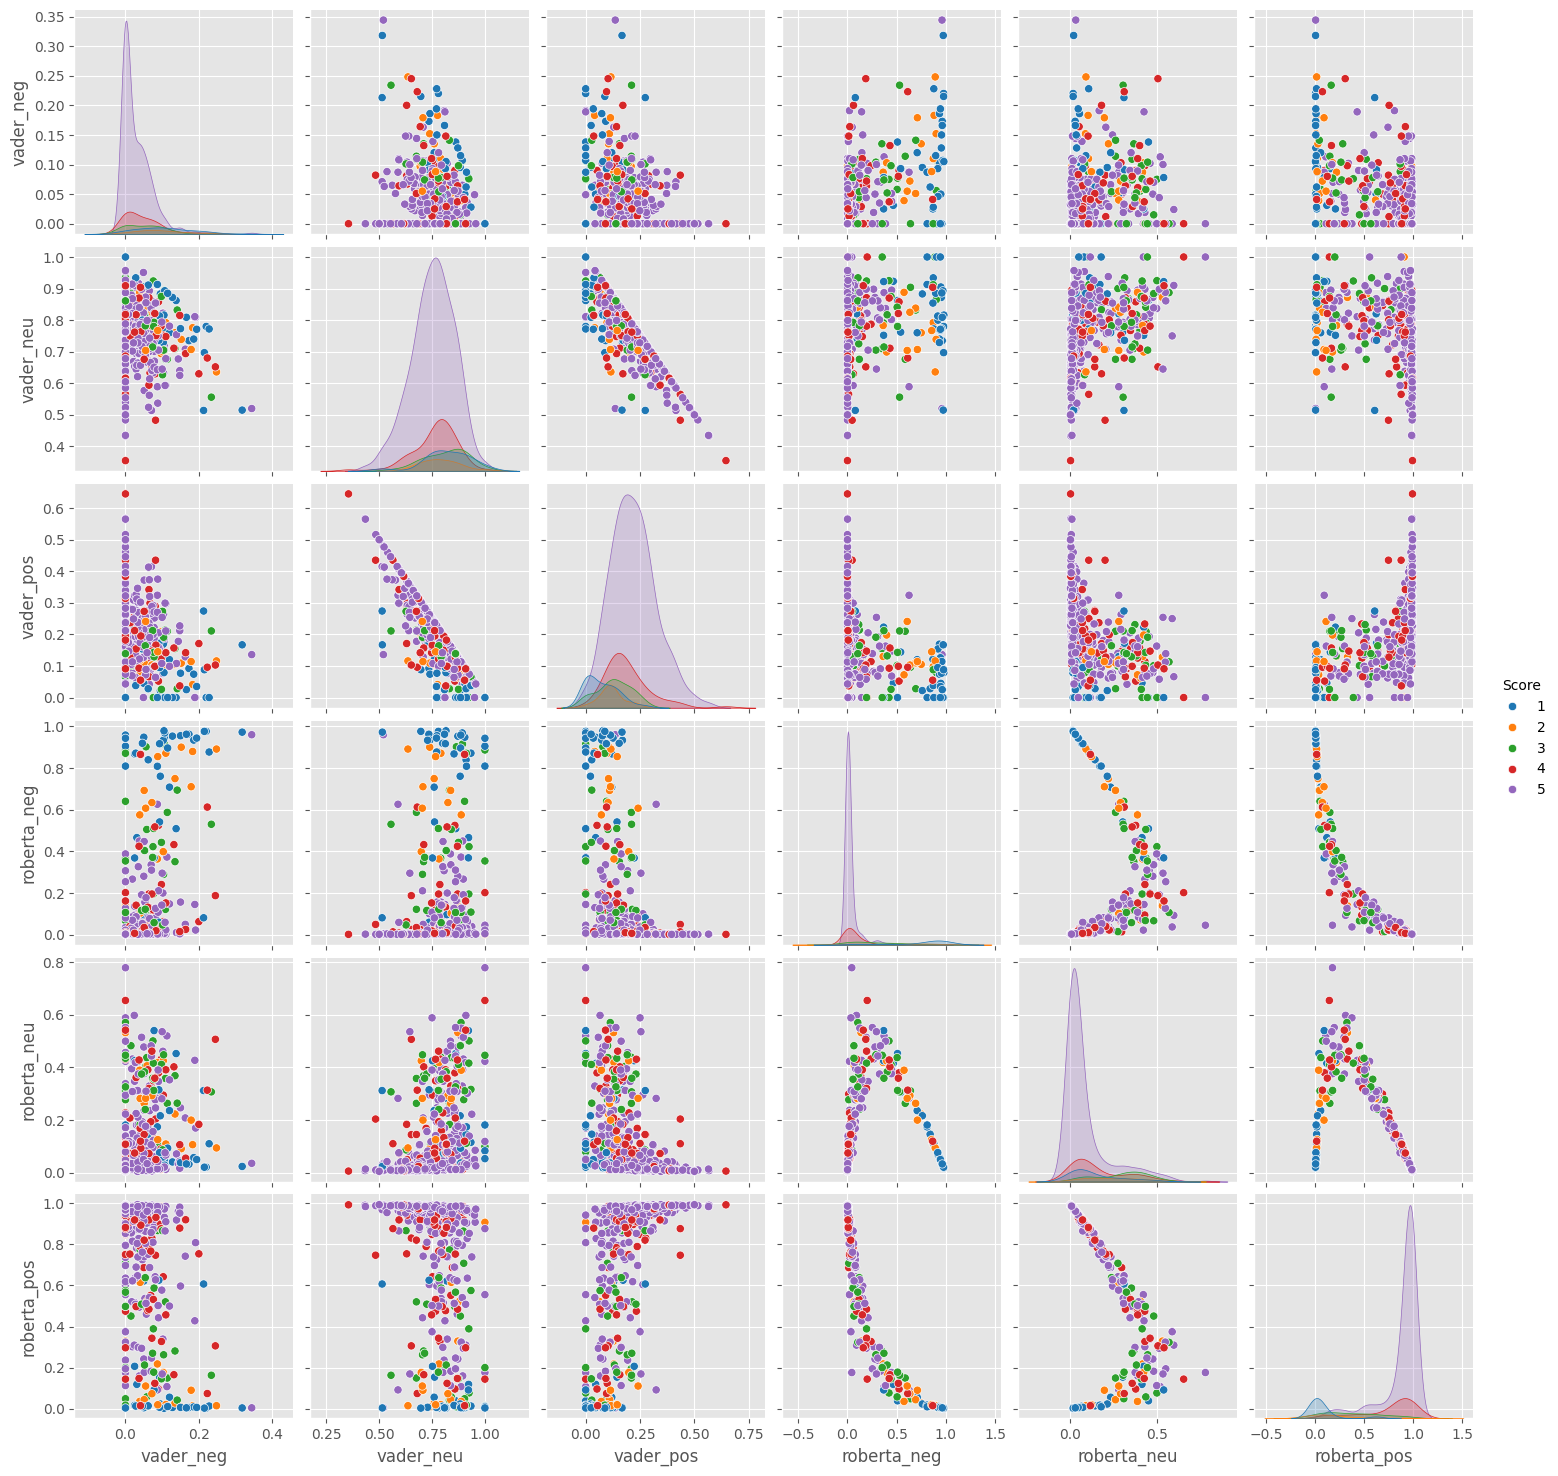

In [27]:
sns.pairplot(data=df_final, 
             vars=[ 'vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg','roberta_neu','roberta_pos'], 
             hue='Score',
             palette='tab10')
plt.show()

### Review Examples <a id =sub_4_1> </a>
Lets look at some examples where the model scoring and review score differ the most.
- Positive 1-Star and Negative 5-Star Reviews

In [28]:
# Positive sentiment with 1-Star review
df_final.query('Score==1') \
.sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [29]:
df_final.query('Score==1') \
  .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [30]:
# Negative sentiment with 5-Star review
df_final.query('Score==5') \
  .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [31]:
df_final.query('Score==5') \
  .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## <span style="color:#fc8080">**5. The Transformers Pipeline** <a id="pipeline"> </a>
- Quick & easy way to run sentiment predictions

In [38]:
from transformers import pipeline
sent_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    revision="714eb0f"
)

Device set to use cpu


In [39]:
sent_pipeline("It's interesting to perform sentitment analysis!")

[{'label': 'POSITIVE', 'score': 0.9997076392173767}]

In [34]:
sent_pipeline("boo")

[{'label': 'NEGATIVE', 'score': 0.9715901017189026}]

In [35]:
sent_pipeline("this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault")

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]

In [36]:
sent_pipeline("I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.")

[{'label': 'NEGATIVE', 'score': 0.9976904392242432}]

## <span style="color:#fc8080">**6. Conclusion: Comparative Insights Between VADER and RoBERTa** <a id="conclusion"> </a>

The analysis revealed key differences in how each model interprets sentiment:

* VADER, being lexicon and rule-based, performed reasonably well on shorter reviews with clear emotional cues and simple language. However, it struggled with longer or contextually rich reviews, often misclassifying sarcasm, nuanced sentiment, or domain-specific language.

* RoBERTa, in contrast, demonstrated a deeper contextual understanding of text. It consistently outperformed VADER in accuracy and reliability, particularly in identifying mixed sentiments, implicit emotions, and subtle cues embedded within longer, more complex reviews.

**Interesting Observations:**

- RoBERTa was more robust in handling negations and sentence structure changes (e.g., “not bad” being correctly classified as positive).

- VADER occasionally skewed results due to keyword bias, classifying reviews with emotional words as overly positive or negative despite the actual context being neutral or mixed.

- In borderline or ambiguous cases, RoBERTa showed a more balanced distribution, while VADER leaned toward polarity extremes.

Overall, the RoBERTa model proved to be more accurate and context-aware, making it a better choice for nuanced sentiment analysis tasks involving customer feedback or product reviews. However, VADER still serves as a lightweight and efficient alternative for real-time applications with limited computational resources.